이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

# 케라스와 텐서플로 소개

## 텐서플로란?

## 케라스란?

## 케라스와 텐서플로의 간략한 역사

## 딥러닝 작업 환경 설정하기

### 주피터 노트북: 권장하는 딥러닝 실험 도구

### 코랩 사용하기

#### 코랩 시작하기

#### pip로 패키지 설치하기

#### GPU 런타임 사용하기

## 텐서플로 시작하기

#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(3, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]
 [1.]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**랜덤 텐서**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)  # mean: 평균 , stddev =표준편차를 의미  #normal은 평균 ,표준편차를 기반으로 무작위 생성  -> 정규분포에서 값을 생성
print(x)

tf.Tensor(
[[-0.98476803]
 [ 0.17731646]
 [ 0.11222438]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)  # minval :생성될 값의 최솟값 ,  maxval : 생성될 값의 최댓값 , #  uniform 은 최솟값 최댓값 기반으로  -> 균등분포에서 값을 생성

**넘파이 배열에 값 할당하기**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

x

array([[0., 1.],
       [1., 1.]])

**텐서플로 변수 만들기**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.0527395 ],
       [-0.4922816 ],
       [-0.15082154]], dtype=float32)>


**텐서플로 변수에 값 할당하기**

In [ ]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [ ]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기**

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

**기본적인 수학 연산**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)   # square 가 제곱이라는 의미
c = tf.sqrt(a)     # sqrt 는 제곱근의 의미
d = b + c
e = tf.matmul(a, b)  # matmul 은 두개의 행렬을 곱한다
e *= d

In [ ]:
b = tf.square(v)
b

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[16.],
       [ 4.],
       [ 4.]], dtype=float32)>

#### GradientTape API 다시 살펴 보기

**`GradientTape` 사용하기**

In [ ]:
input_var = tf.Variable(initial_value=3.)    

print(input_var)     #test
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


**상수 입력 텐서와 함께 `GradientTape` 사용하기**

In [ ]:
input_const = tf.constant(3.)   # constant 는 상수 생성

print(input_const)
with tf.GradientTape() as tape:
   tape.watch(input_const)      # watch는 모델을 학습할때 기울기를 계산하도록 한다.
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

tf.Tensor(3.0, shape=(), dtype=float32)


**그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)     # this 스터디 ?????

#### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [ ]:
num_samples_per_class = 1000    # 클래스당 샘플수를 1000개로 지정
negative_samples = np.random.multivariate_normal(
    mean=[10, 5],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)    # 평균이 [0,3]  이고 공분산 행렬이 COV이다 -> 다중 정규 분포
positive_samples = np.random.multivariate_normal(
    mean=[10, 5],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [ ]:
negative_samples

array([[10.86719526,  4.16554291],
       [10.21946066,  4.25829603],
       [ 9.68799473,  5.49200287],
       ...,
       [ 9.57381404,  5.00777754],
       [10.80252197,  6.05971555],
       [10.32934547,  4.89414008]])

In [ ]:
positive_samples.shape

(1000, 2)

**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)  # Inputs를 생성함

In [ ]:
inputs

array([[10.867195 ,  4.165543 ],
       [10.2194605,  4.258296 ],
       [ 9.687995 ,  5.492003 ],
       ...,
       [11.432324 ,  6.420402 ],
       [ 9.867202 ,  3.5523138],
       [10.494985 ,  6.207889 ]], dtype=float32)

**(0과 1로 구성된) 타깃 생성하기**

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [ ]:
targets.shape

(2000, 1)

**두 클래스의 포인트를 그래프로 그리기**

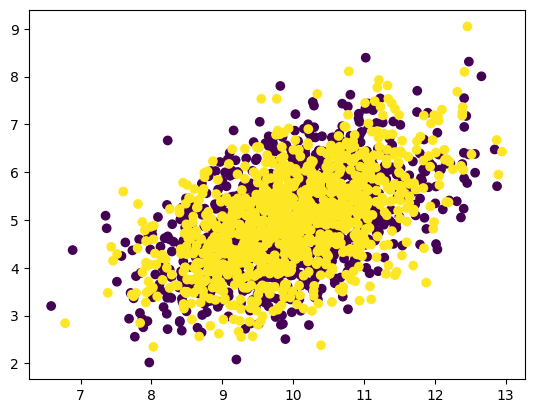

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])   #scatter : 산점도 ,  x축 ,y축을 결정하는 것
plt.show()

**선형 분류기의 변수 만들기**

In [ ]:
input_dim = 2  #입력데이터의 차원을 나타내는 변수 , 위에서 inputs의 배열의 열 수가 2 이므로 -> 2
output_dim = 1   # 출력 데이터의 차원을 나타내는 변수 , 이진 분류 문제를 풀고 있으므로 , 1이 된다
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))  #가중치를 의미 
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))  # 편향을 의미 , 벡터 생성 
# 위 w,b 는 무작위로 초기화 된다.

In [ ]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.63975644],
       [0.42902005]], dtype=float32)>

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

**정방향 패스 함수**

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**평균 제곱 오차 손실 함수**

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**훈련 스텝 함수**

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)               # 가중치와 편향을 사용하여 예측값을 계산한다.
        loss = square_loss(targets, predictions)  # MSE 오차를 계산
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])  # 컨텍스트에서 계산된 그래디언트를 사용하여 , w 와 b 변수에 대한 그래디언트를 계산한다.
    W.assign_sub(grad_loss_wrt_W * learning_rate)    # W변수의 값을 업데이트한다.  , assign_sub 는 현재값에서 뺴는 것이다. , gradient 반대 방향으로 일정한 속도로 이동한다.
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**배치 훈련 루프**

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 65.7129
1번째 스텝의 손실: 39094.9453
2번째 스텝의 손실: 23352238.0000
3번째 스텝의 손실: 13948879872.0000
4번째 스텝의 손실: 8332018450432.0000
5번째 스텝의 손실: 4976923813871616.0000
6번째 스텝의 손실: 2972841122360983552.0000
7번째 스텝의 손실: 1775752585311072288768.0000
8번째 스텝의 손실: 1060701835469136613867520.0000
9번째 스텝의 손실: 633583899232764318430789632.0000
10번째 스텝의 손실: 378455587871906729599589941248.0000
11번째 스텝의 손실: 226061081657680300698268067692544.0000
12번째 스텝의 손실: 135031924569967566795024680175534080.0000
13번째 스텝의 손실: inf
14번째 스텝의 손실: inf
15번째 스텝의 손실: inf
16번째 스텝의 손실: inf
17번째 스텝의 손실: inf
18번째 스텝의 손실: inf
19번째 스텝의 손실: inf
20번째 스텝의 손실: inf
21번째 스텝의 손실: inf
22번째 스텝의 손실: inf
23번째 스텝의 손실: inf
24번째 스텝의 손실: inf
25번째 스텝의 손실: inf
26번째 스텝의 손실: inf
27번째 스텝의 손실: inf
28번째 스텝의 손실: inf
29번째 스텝의 손실: nan
30번째 스텝의 손실: nan
31번째 스텝의 손실: nan
32번째 스텝의 손실: nan
33번째 스텝의 손실: nan
34번째 스텝의 손실: nan
35번째 스텝의 손실: nan
36번째 스텝의 손실: nan
37번째 스텝의 손실: nan
38번째 스텝의 손실: nan
39번째 스텝의 손실: nan


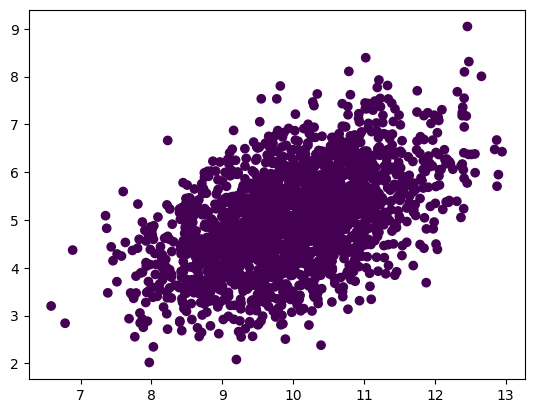

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) # 예측값이 0.5보다 큰 경우를 true , 그렇지 않은 경우를 false로 나타내는 벡터를 만든다.
plt.show()

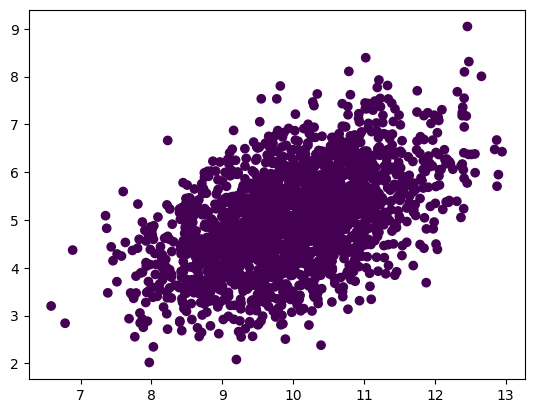

In [ ]:
x = np.linspace(-1, 4, 100)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.
# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

### 층: 딥러닝의 구성 요소

#### 케라스의 Layer 클래스

**`Layer`의 서브클래스로 구현한 `Dense` 층**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):      #레이어의 출력 크기(units)와 활성화 함수(activation)가 전달
                                                     #__init__ :계층의 단위(뉴런) 수 및 사용할 활성화 함수를 포함하여 계층의 속성을 초기화합니다.
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):  # build메소드는 레이어가 모델에서 처음 사용될 때 호출되며 레이어의 가중치를 정의
        input_dim = input_shape[-1]
        self.W = self.add_weight(sha4pe=(input_dim, self.units),
                                 initializer="random_normal")   # 정규분포로 하고 있다. 
        self.b = self.add_weight(shape=(self.units,),   #bias는 unit의 갯수로  , input의 갯수가 아니다.
                                 initializer="zeros")

    def call(self, inputs):           
        y = tf.matmul(inputs, self.W) + self.b  # call방법은 레이어가 입력을 처리하는 방법을 정의
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)   # 출력 크기 32 , 활성화 함수 RELU
input_tensor = tf.ones(shape=(2, 784))                     # 크기가 (2,784) 인 입력 텐서를 생성한다. 
output_tensor = my_dense(input_tensor)                     # my_dense 객체를 사용하여 입력 텐서를 처리하여 출력 텐서(output tensor)를 생성  , 출력텐서의 크기는 (2,32)
print(output_tensor.shape)

(2, 32)


In [ ]:
input_tensor

<tf.Tensor: shape=(2, 784), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

#### 자동 크기 추론: 동적으로 층 만들기

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models    #models 모델 임포트 
from tensorflow.keras import layers
model = models.Sequential([       # sequential 클래스는 레이어를 순차적으로 연결하여 모델을 생성한다.
    layers.Dense(32, activation="relu"),
    layers.Dense(32)                 # 활성화 함수를 지정하지 않았으므로 , 기본값으로 선형함수가 사용된다.
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 층에서 모델로

### “컴파일” 단계: 학습 과정 설정

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 손실 함수 선택하기

### fit() 메서드 이해하기

**넘파이 데이터로 `fit()` 메서드 호출하기**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 2s 7ms/step - loss: 332.7885 - binary_accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 0s 5ms/step - loss: 321.8763 - binary_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 312.5639 - binary_accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 303.5592 - binary_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 294.7295 - binary_accuracy: 0.5000


In [ ]:
history.history  # test 시험에 나온다  . -> 변수.history하면 된다  . 이때 dictionary형태로 나온다.

{'loss': [332.7885437011719,
  321.87628173828125,
  312.5638732910156,
  303.5592041015625,
  294.7295227050781],
 'binary_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5]}

### 검증 데이터에서 손실과 측정 지표 모니터링하기

**`validation_data` 매개변수 사용하기**

In [ ]:
from keras.callbacks import EarlyStopping  # earlystopping 사용
early_stopping = EarlyStopping()
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))   # permutation -> random하게 
shuffled_inputs = inputs[indices_permutation]    #test 시험에 나옴
shuffled_targets = targets[indices_permutation]   #그럼 inputs이 전체에서 테스트 뺀 데이터 개수인가(0)

num_validation_samples = int(0.3 * len(inputs)) 
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=100,
    batch_size=16,
    validation_data=(val_inputs, val_targets) ,callbacks = [early_stopping]  #validationdata를 argument로 넣어줘야된다 . , compile할때 까지는 괜찮은데 , 
                                                 # fit할때는 필요하다.
                                                # training , test로 나눈 후 train 안에서 puretrain과 validation으로 다시 나누어준다.
)

Epoch 1/100
88/88 [==============================] - 2s 10ms/step - loss: 1.7353 - binary_accuracy: 0.4871 - val_loss: 0.3479 - val_binary_accuracy: 0.4817
Epoch 2/100
88/88 [==============================] - 1s 11ms/step - loss: 0.9613 - binary_accuracy: 0.4979 - val_loss: 0.2645 - val_binary_accuracy: 0.4900
Epoch 3/100
88/88 [==============================] - 1s 6ms/step - loss: 0.8278 - binary_accuracy: 0.5250 - val_loss: 2.2562 - val_binary_accuracy: 0.5033


### 추론: 훈련한 모델 사용하기

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])    #차원 조심하기

5/5 [==============================] - 0s 5ms/step
[[-1.0057019 ]
 [-0.7926291 ]
 [-0.94690716]
 [-0.9460746 ]
 [-1.369888  ]
 [-1.0929991 ]
 [-0.8748082 ]
 [-1.257687  ]
 [-1.2976886 ]
 [-0.9218502 ]]


## 요약